In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
from sklearn.metrics import r2_score

## Load data

In [124]:
df = pd.read_csv("data/titanic_train.csv")

In [125]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
def data_preprocess(df):
    # Treat None as a category
    df.loc[df['Embarked'].isna(), 'Embarked'] = 'U'
    # Feature Preprocessing
    del df['PassengerId']
    del df['Name']
    del df['Ticket']
    del df['Cabin']
    del df['Age']
    #df.dropna(inplace=True)
    d_sex={}
    d_sex['male'] = 1
    d_sex['female'] = 0

    d_embarked = {}
    d_embarked['S'] = 0
    d_embarked['C'] = 1
    d_embarked['Q'] = 2
    d_embarked['U'] = 3

    df['Sex'] = df['Sex'].apply(d_sex.get)
    df['Sex'] = df['Sex'].astype(int)
    df['Embarked'] = df['Embarked'].apply(d_embarked.get)
    df['Embarked'] = df['Embarked'].astype(int)
    return df

In [128]:
df = data_preprocess(df)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 41.9 KB


# Target Statistics
Instead of doing target statistics in the algorithm, I choose to do it here.

In [130]:
y = df['Survived']
n = len(y)

In [131]:
prior = y.sum()/n
prior

0.3838383838383838

In [132]:
prior_weight = 0.5

In [133]:
# Pclass
d_pclass={}
pclass_values=df['Pclass'].unique()
for v in pclass_values:
    n_v = y[df['Pclass']==v].count()
    sum_y = y[df['Pclass']==v].sum()
    d_pclass[v] = (sum_y + prior_weight*prior) / (n_v + prior_weight)
display(d_pclass)

{3: 0.2425064479998356, 1: 0.6290619824107122, 2: 0.47258492786948075}

In [134]:
# SibSp
d_sibsp={}
psibsp_values=df['SibSp'].unique()
for v in psibsp_values:
    n_v = y[df['SibSp']==v].count()
    sum_y = y[df['SibSp']==v].sum()
    d_sibsp[v] = (sum_y + prior_weight*prior) / (n_v + prior_weight)
display(d_sibsp)


{1: 0.5355222873122635,
 0: 0.34542632570570125,
 3: 0.25405570860116317,
 4: 0.17253617253617254,
 2: 0.4628743576111997,
 5: 0.03489439853076216,
 8: 0.02558922558922559}

In [135]:
# Parch
d_parch={}
parch_values=df['Parch'].unique()
for v in parch_values:
    n_v = y[df['Parch']==v].count()
    sum_y = y[df['Parch']==v].sum()
    d_parch[v] = (sum_y + prior_weight*prior) / (n_v + prior_weight)
display(d_parch)

{0: 0.34368742695935034,
 1: 0.5501427779908793,
 2: 0.49927849927849927,
 5: 0.21671258034894397,
 3: 0.5803489439853077,
 4: 0.04264870931537598,
 6: 0.12794612794612795}

In [136]:
# Embarked
d_embarked={}
embarked_values=df['Embarked'].unique()
for v in embarked_values:
    n_v = y[df['Embarked']==v].count()
    sum_y = y[df['Embarked']==v].sum()
    d_embarked[v] = (sum_y + prior_weight*prior) / (n_v + prior_weight)
display(d_embarked)

{0: 0.33699289246224856,
 1: 0.5530677696849804,
 2: 0.38957315086347344,
 3: 0.8767676767676769}

In [137]:
def target_statistics(df):
    df['Pclass']=df['Pclass'].apply(d_pclass.get)
    df['SibSp']=df['SibSp'].apply(d_sibsp.get)
    df['Parch']=df['Parch'].apply(d_parch.get)
    df['Embarked']=df['Embarked'].apply(d_embarked.get)
    return df

In [138]:
df=target_statistics(df)

In [139]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0.242506,1,0.535522,0.343687,7.2500,0.336993
1,1,0.629062,0,0.535522,0.343687,71.2833,0.553068
2,1,0.242506,0,0.345426,0.343687,7.9250,0.336993
3,1,0.629062,0,0.535522,0.343687,53.1000,0.336993
4,0,0.242506,1,0.345426,0.343687,8.0500,0.336993


In [140]:
y = df['Survived']
y = np.array(y.values)
X = df.drop('Survived', axis=1)
X = np.array(X.values)
X_train, X_test, y_train, y_test = train_test_split(X, y)
n=X_train.shape[0]

In [141]:
X_train.shape

(668, 6)

In [142]:
y_train.shape

(668,)

# Oblivious Tree


In [55]:
class SplitResult():
    similarity = 0
    similarity_gain = 0
    i_feature = -1
    split_value = None
    split_quantile = 0
    # left
    left_X = None
    left_y = None
    left_y_previous = None
    left_similarity = 0
    left_n = 0
    # right
    right_X = None
    right_y = None
    right_y_previous = None
    right_similarity = 0
    right_n = 0


class Level():
    level = -1
    similarity = 0
    similarity_gain = 0
    split_value = None
    split_quantile = 0
    splits = []
    branches = []

    def __init__(self):
        self.splits = []
        self.branches = []


class Branch():
    no = 0
    depth = 1
    i_feature = -1
    split_value = 0
    split_quantile = 0
    similarity = 0
    similarity_gain = 0
    n_samples = 0
    X = None
    y = None
    y_previous = None

    left_branch = None
    right_branch = None

    def value(self, _lambda):
        return np.sum(self.y)/(np.sum(self.y_previous * (1 - self.y_previous))+_lambda)

    def is_leaf(self):
        return self.left_branch is None and self.right_branch is None


class ObliviousTree():

    _lambda = 1
    node_number = 0
    tree = None
    max_depth = 3
    gamma = 2
    colsample_bynode = 1.0
    feature_splits = []
    feature_names = []
    verbose = False

    def __init__(self, max_depth=3, _lambda=1, gamma=2, colsample_bynode=1.0, feature_names=[], verbose=False):

        self.max_depth = max_depth
        self._lambda = _lambda
        self.gamma = gamma
        self.colsample_bynode = colsample_bynode
        self.feature_names = feature_names
        self.verbose=verbose
        self.feature_splits=[]
        feature_names=[]

    def get_similarity(self, y, y_previous):
        sim = np.sum(y)**2/(np.sum(y_previous * (1-y_previous))+self._lambda)

        return sim

    def get_colsample_bynode_indics(self, n_features):
        if n_features == 1:
            return [1]

        if self.colsample_bynode > 1:
            raise ValueError(
                "colsample_bynode must be smaller than or equal to 1.0")

        n_selected_features = int(self.colsample_bynode * n_features)
        if n_selected_features == n_features:
            return list(range(n_features))

        old_list = list(range(n_features))
        new_list = []
        for i in range(n_selected_features):
            selected = random.choice(old_list)
            while selected in new_list:
                selected = random.choice(old_list)
            new_list.append(selected)
        return new_list

    def find_best_split(self, X_all, X_list, y_list, y_previous_list):
        n_list_len = len(y_list)
        n_features = X_all.shape[1]
        best_level = Level()

        selected_features = self.get_colsample_bynode_indics(n_features)
        for i_feature, split_value, split_quantile in self.feature_splits:
            if not i_feature in selected_features:
                continue
            level = Level()
            level.i_feature = i_feature
            level.split_value = split_value
            level.split_quantile = split_quantile
            # strange, i have to write this otherwise splits will copy values from previous Level objects.
            level.splits = []

            similarities = []
            for list_index in range(n_list_len):
                X = X_list[list_index]
                f = X[:, i_feature]
                condition = f < split_value
                y = y_list[list_index]
                y_previous = y_previous_list[list_index]

                # Approximate Algorithm
                # Instead of Basic Exact Greedy Algorithm

                sr = SplitResult()
                sr.i_feature = level.i_feature
                sr.split_quantile = level.split_quantile
                sr.split_value = level.split_value
                # print(condition)
                # left
                sr.left_X = X[condition, :]
                sr.left_y = y[condition]
                sr.left_y_previous = y_previous[condition]
                sr.left_n = len(sr.left_y)
                #if sr.left_n == 0:
                #    continue
                sr.left_similarity = self.get_similarity(
                    sr.left_y, sr.left_y_previous)

                # right
                sr.right_X = X[~condition, :]
                sr.right_y = y[~condition]
                sr.right_y_previous = y_previous[~condition]
                sr.right_n = len(sr.right_y)
                # if sr.right_n == 0:
                #    continue
                sr.right_similarity = self.get_similarity(
                    sr.right_y, sr.right_y_previous)

                sr.similarity = sr.left_similarity + sr.right_similarity
                similarities.append(sr.similarity)
                level.splits.append(sr)
            level.similarity = np.sum(similarities)
            if level.similarity > best_level.similarity:
                best_level = level
        return best_level

    def fit(self, X, y, y_previous):
        
        n_features = X.shape[1]
        for i_feature in range(n_features):

            f = X[:, i_feature]
            quantiles = np.quantile(
                f, [.1, .2, .3, .4, .5, .6, .7, .8, .9])
            previous_split_value = f.min()
            for split_value, split_quantile in zip(quantiles, [.1, .2, .3, .4, .5, .6, .7, .8, .9]):
                if split_value == previous_split_value:
                    continue
                else:
                    self.feature_splits.append(
                        (i_feature, split_value, split_quantile))
                previous_split_value = split_value

        level_dict = {}
        level0 = self.find_best_split(X, [X], [y], [y_previous])
        #print("Feature", "Split_Value", "Split_Quantile")
        #print(level0.i_feature, level0.split_value, level0.split_quantile)
        level_dict[0] = level0
        branch_no=0
        root = Branch()
        root.no = branch_no
        branch_no+=1
        root.i_feature = level_dict[0].i_feature
        root.split_value = level_dict[0].split_value
        root.split_quantile = level_dict[0].split_quantile
        root.X = X
        root.y = y
        root.y_previous = y_previous
        root.n_samples = len(y)
        level_dict[0].branches.append(root)
        for level_no in range(1, self.max_depth):

            X_list = []
            y_list = []
            y_previous_list = []

            for sr in level_dict[level_no-1].splits:
                X_list.append(sr.left_X)
                X_list.append(sr.right_X)
                y_list.append(sr.left_y)
                y_list.append(sr.right_y)
                y_previous_list.append(sr.left_y_previous)
                y_previous_list.append(sr.right_y_previous)

            if level_no==self.max_depth-1:
                pass
            else:
                level_dict[level_no] = self.find_best_split(
                    X, X_list, y_list, y_previous_list)

            # build tree
            previous_level = level_dict[level_no-1]
            # splits = level_dict[level_no-1].splits
            for sr_index, sr in enumerate(previous_level.splits):
                parent_index = sr_index
                parent_branch = previous_level.branches[parent_index]
                # left branch
                left_branch = Branch()
                left_branch.no = branch_no
                branch_no+=1

                left_branch.X = level_dict[level_no - 1] \
                    .splits[parent_index].left_X
                left_branch.y = level_dict[level_no - 1] \
                    .splits[parent_index].left_y
                left_branch.y_previous = level_dict[level_no-1] \
                    .splits[parent_index].left_y_previous
                left_branch.n_samples = len(left_branch.y)
                parent_branch.left_branch = left_branch
                if level_no!=self.max_depth-1:
                    left_branch.i_feature = level_dict[level_no].i_feature
                    left_branch.split_value = level_dict[level_no].split_value
                    left_branch.split_quantile = level_dict[level_no].split_quantile
                    level_dict[level_no].branches.append(left_branch)
                # right branch
                right_branch = Branch()
                right_branch.no = branch_no
                branch_no+=1

                
                right_branch.X = level_dict[level_no -
                                            1].splits[parent_index].right_X
                right_branch.y = level_dict[level_no -
                                            1].splits[parent_index].right_y
                right_branch.y_previous = level_dict[level_no -
                                                     1].splits[parent_index].right_y_previous
                right_branch.n_samples = len(right_branch.y)
                parent_branch.right_branch = right_branch
                if level_no!=self.max_depth-1:
                    right_branch.i_feature = level_dict[level_no].i_feature
                    right_branch.split_value = level_dict[level_no].split_value
                    right_branch.split_quantile = level_dict[level_no].split_quantile
                    level_dict[level_no].branches.append(right_branch)

        self.tree = root
        return root

    def predict_one_inner(self, tree: Branch, x):
        if tree.is_leaf():
            return tree.value(self._lambda)
        if x[tree.i_feature] < tree.split_value:
            return self.predict_one_inner(tree.left_branch, x)
        else:
            return self.predict_one_inner(tree.right_branch, x)

    def predict_inner(self, tree: Branch, X):
        y = []
        for x in X:
            t = self.predict_one_inner(tree, x)
            y.append(t)
        return np.array(y)

    def predict(self, X):
        return self.predict_inner(self.tree, X)

    def score(self, X, y):
        y_hat = self.predict(X)
        return r2_score(y, y_hat)

    def export_graphviz_inner(self, the_branch: Branch, dot_data: str):
        fillcolor = "#ffffff"
        colors=["#04b0f1", "#6c7115", "#e96b4c", "#d72203", "#eb05f4", "#b0c48b", "#7a2c1c", "#207dfb"]


        if the_branch.is_leaf():
            n_positive = sum(the_branch.y >= 0)
            n_negative = sum(the_branch.y < 0)
            dot_data += f"{the_branch.no} [label=\"{the_branch.no}\n" +  \
                f"samples={the_branch.n_samples:0.0f}\\n" + \
                f"+/- = {n_positive}/{n_negative}\\n" + \
                f"value={the_branch.value(self._lambda):0.3f}\\n" + \
                f"\", fillcolor=\"{colors[the_branch.i_feature]}\"];"
        else:
            dot_data += f"{the_branch.no} [label=\"{the_branch.no}\n" + \
                f"{self.feature_names[the_branch.i_feature]} < {the_branch.split_value:0.3f}\\n" + \
                f"split_quantile = {the_branch.split_quantile:0.1f}\\n" + f"samples = {the_branch.n_samples:0.0f}\\n" + \
                f"\", fillcolor=\"{colors[the_branch.i_feature]}\"];"

        if not the_branch.left_branch is None:
            left_branch = the_branch.left_branch
            if left_branch.no > 0:
                dot_data += f"{the_branch.no} -> {left_branch.no} [label=\"yes\"];"
                dot_data = self.export_graphviz_inner(left_branch, dot_data)
        if not the_branch.right_branch is None:
            right_branch = the_branch.right_branch
            if right_branch.no > 0:
                dot_data += f"{the_branch.no} -> {right_branch.no}  [label=\"no\"];"
                dot_data = self.export_graphviz_inner(right_branch, dot_data)
        return dot_data

    def export_graphviz(self):
        dot_data = """digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n"""
        dot_data += self.export_graphviz_inner(self.tree, "")
        dot_data += "}"
        dot_data = dot_data.replace("\r\n", "\n")
        return dot_data

    def get_feature_split_table(self):
        df=pd.DataFrame()
        for f, sv, sq in self.feature_splits:
            df=df.append({'feature':f, 'split_value': sv, 'split_quantitle': sq}, ignore_index=True)
        return df

## Try the Tree

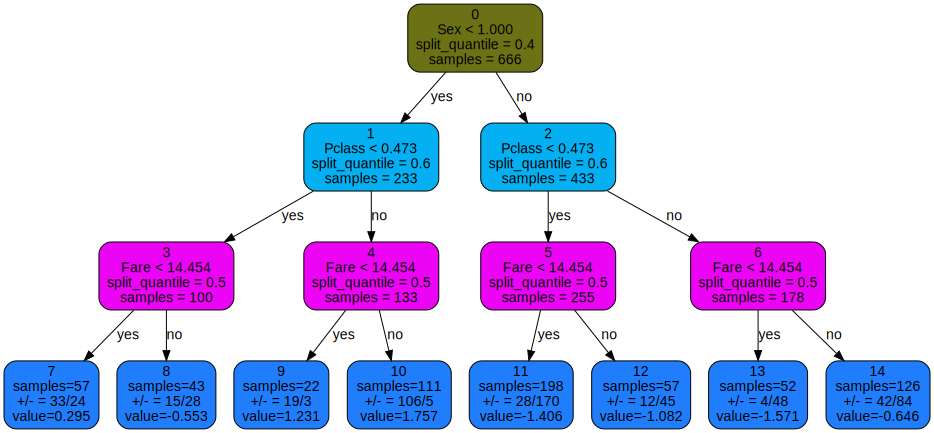

In [56]:
y_train0 = np.array([0.5] * len(y_train)) 
feature_names = ['Pclass', 'Sex',
                 'SibSp', 'Parch', 'Fare', 'Embarked']
ot = ObliviousTree(max_depth=4, feature_names=feature_names, verbose=True)
ot.fit(X_train, y_train-y_train0, y_train0)
dot_data=ot.export_graphviz()

graph = graphviz.Source(dot_data) 
display(graph)

In [57]:
ot.get_feature_split_table()

,feature,split_quantitle,split_value
0,0.0,0.6,0.472581
1,0.0,0.8,0.625600
2,1.0,0.4,1.000000
3,2.0,0.1,0.343267
4,2.0,0.8,0.535519
5,3.0,0.1,0.341746
6,3.0,0.8,0.499270
7,3.0,0.9,0.550137
8,4.0,0.1,7.731250
9,4.0,0.2,7.895800


## Step 1 Average

In [58]:
n_train = len(y_train)

In [59]:
df_train = pd.DataFrame()
df_train['y'] = np.array(y_train)

In [60]:
#now let's get started
learning_rate=0.5
loss = [0] * 6
residuals = np.zeros([6,n_train])
probabilities = np.zeros([6,n_train])
predictions = np.zeros([6,n_train])
log_of_odds = np.zeros([6,n_train])
gamma = np.zeros([6,n_train])
log_of_odds[0] = [0] * n_train
#calculation
#average_y=y.mean()
probabilities[0] = [0.5] * n_train
predictions[0] = [1] * n_train
residuals[0] = y_train - probabilities[0]
df_train['$f_0$']=np.array(predictions[0]).reshape((-1, 1))
df_train['$r_0$']=np.array(residuals[0]).reshape((-1, 1))
display(df_train)
loss0=-(y_train*np.log(probabilities[0])+(1-y_train)*np.log(1-probabilities[0]))
loss[0] = np.sum(loss0) / n_train
print(loss[0])
trees = []

,y,$f_0$,$r_0$
0,0,1.0,-0.5
1,0,1.0,-0.5
2,0,1.0,-0.5
3,0,1.0,-0.5
4,1,1.0,0.5
...,...,...,...
661,1,1.0,0.5
662,0,1.0,-0.5
663,1,1.0,0.5
664,1,1.0,0.5


0.6931471805599453


## Step 2 For Loop

In [61]:
def iterate(i):
    t = ObliviousTree(max_depth=4, gamma=5, feature_names=feature_names)
    t.fit(X_train,residuals[i], probabilities[i])
    trees.append(t)
    
    dot_data = t.export_graphviz()
    graph = graphviz.Source(dot_data) 
    display(graph)

    #next prediction, residual
    gamma[i]=t.predict(X_train)
    log_of_odds[i+1] = log_of_odds[i] + 0.5 * gamma[i]
    probabilities[i+1] = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in log_of_odds[i+1]])
    predictions[i+1] = (probabilities[i+1]>0.5)*1.0
    residuals[i+1]=y_train-probabilities[i+1]
    loss[i+1]=np.sum(-y_train * log_of_odds[i+1] + np.log(1+np.exp(log_of_odds[i+1])))
    loss[i+1]=loss[i+1]/n_train
    y_hat=t.predict(X_train)
    
    new_df=pd.DataFrame()
    new_df['y']=y_train
    new_df[f'$p_{i}$']=probabilities[i]
    new_df[f'$l_{i}$']=log_of_odds[i]
    new_df[f'$r_{i}$']=residuals[i]
    new_df[f'$\gamma_{i}$']=gamma[i]
    new_df[f'$l_{i+1}$']=log_of_odds[i+1]
    new_df[f'$p_{i+1}$']=probabilities[i+1]
    display(new_df)


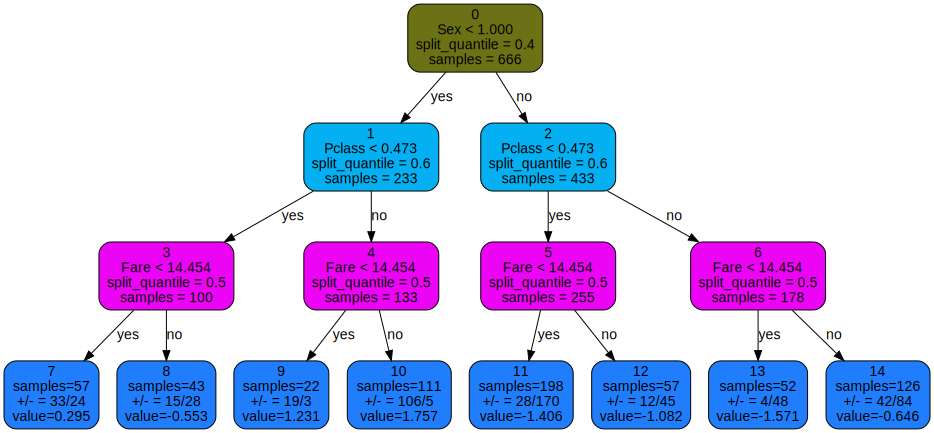

,y,$p_0$,$l_0$,$r_0$,$\gamma_0$,$l_1$,$p_1$
0,0,0.5,0.0,-0.5,-1.405941,-0.702970,0.331154
1,0,0.5,0.0,-0.5,-1.081967,-0.540984,0.367959
2,0,0.5,0.0,-0.5,-1.405941,-0.702970,0.331154
3,0,0.5,0.0,-0.5,-1.571429,-0.785714,0.313090
4,1,0.5,0.0,0.5,-1.405941,-0.702970,0.331154
...,...,...,...,...,...,...,...
661,1,0.5,0.0,0.5,1.756522,0.878261,0.706462
662,0,0.5,0.0,-0.5,-1.081967,-0.540984,0.367959
663,1,0.5,0.0,0.5,1.756522,0.878261,0.706462
664,1,0.5,0.0,0.5,1.756522,0.878261,0.706462


In [62]:
iterate(0)

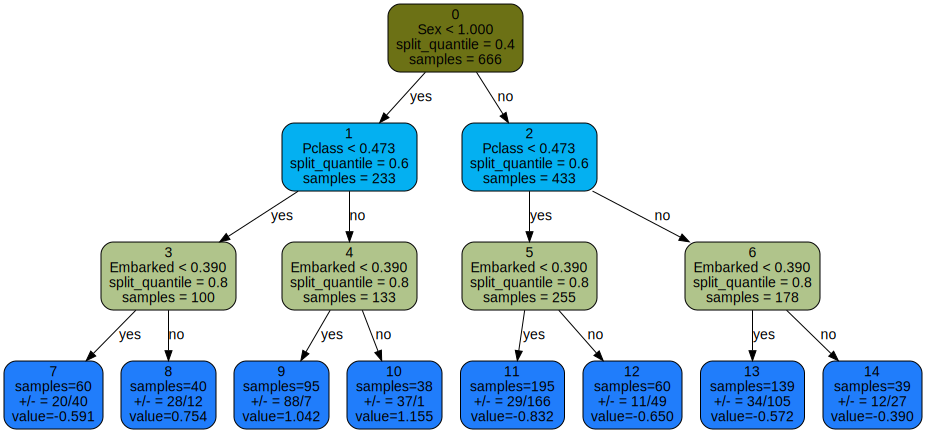

,y,$p_1$,$l_1$,$r_1$,$\gamma_1$,$l_2$,$p_2$
0,0,0.331154,-0.702970,-0.331154,-0.831882,-1.118911,0.246213
1,0,0.367959,-0.540984,-0.367959,-0.831882,-0.956925,0.277494
2,0,0.331154,-0.702970,-0.331154,-0.649694,-1.027817,0.263507
3,0,0.313090,-0.785714,-0.313090,-0.571850,-1.071639,0.255091
4,1,0.331154,-0.702970,0.668846,-0.831882,-1.118911,0.246213
...,...,...,...,...,...,...,...
661,1,0.706462,0.878261,0.293538,1.042067,1.399294,0.802072
662,0,0.367959,-0.540984,-0.367959,-0.831882,-0.956925,0.277494
663,1,0.706462,0.878261,0.293538,1.154900,1.455711,0.810876
664,1,0.706462,0.878261,0.293538,1.042067,1.399294,0.802072


In [63]:
iterate(1)

In iteration 1, we firstly train a tree using residuals_1. This tree tells us height is also important in determining weight. Whose who are less than 1.55 meters are supported to lose -7.289 and the other to gain 7.289. Again, we want to shrink this to 20%, which is -1.4578 and 1.4578. We then make prediction_2 based on prediction_1 and $\gamma$. We see Alex gains 1.4578 kg because he is 1.6. Others also gain or lose weight because of the new rule.

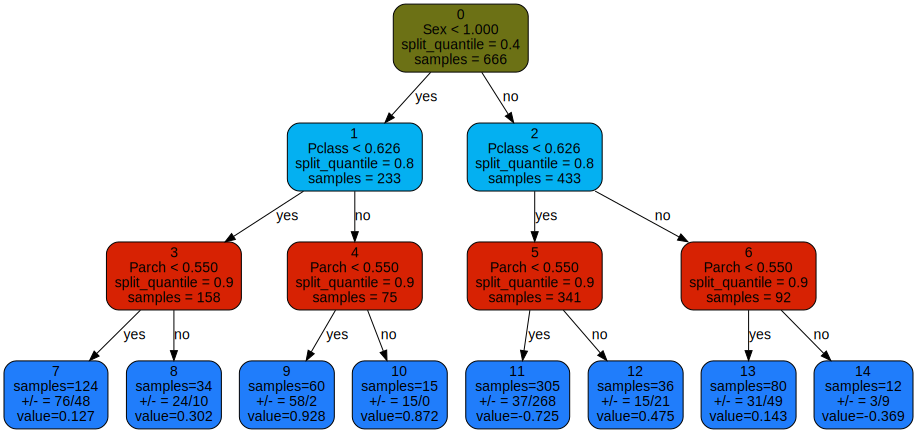

,y,$p_2$,$l_2$,$r_2$,$\gamma_2$,$l_3$,$p_3$
0,0,0.246213,-1.118911,-0.246213,-0.725307,-1.481565,0.185191
1,0,0.277494,-0.956925,-0.277494,-0.725307,-1.319578,0.210888
2,0,0.263507,-1.027817,-0.263507,-0.725307,-1.390471,0.199333
3,0,0.255091,-1.071639,-0.255091,-0.725307,-1.434293,0.192431
4,1,0.246213,-1.118911,0.753787,-0.725307,-1.481565,0.185191
...,...,...,...,...,...,...,...
661,1,0.802072,1.399294,0.197928,0.301524,1.550056,0.824922
662,0,0.277494,-0.956925,-0.277494,-0.725307,-1.319578,0.210888
663,1,0.810876,1.455711,0.189124,0.928198,1.919810,0.872117
664,1,0.802072,1.399294,0.197928,0.928198,1.863393,0.865692


In [64]:
iterate(2)

Iteration 2 again tells us that gender matters.

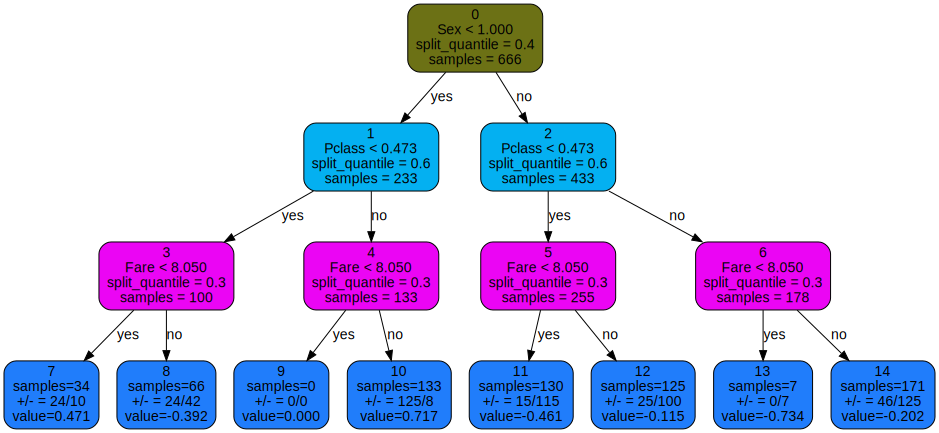

,y,$p_3$,$l_3$,$r_3$,$\gamma_3$,$l_4$,$p_4$
0,0,0.185191,-1.481565,-0.185191,-0.460814,-1.711972,0.152908
1,0,0.210888,-1.319578,-0.210888,-0.115367,-1.377262,0.201449
2,0,0.199333,-1.390471,-0.199333,-0.460814,-1.620878,0.165084
3,0,0.192431,-1.434293,-0.192431,-0.201519,-1.535052,0.177256
4,1,0.185191,-1.481565,0.814809,-0.115367,-1.539248,0.176645
...,...,...,...,...,...,...,...
661,1,0.824922,1.550056,0.175078,0.716687,1.908400,0.870839
662,0,0.210888,-1.319578,-0.210888,-0.115367,-1.377262,0.201449
663,1,0.872117,1.919810,0.127883,0.716687,2.278153,0.907051
664,1,0.865692,1.863393,0.134308,0.716687,2.221737,0.902185


In [65]:
iterate(3)

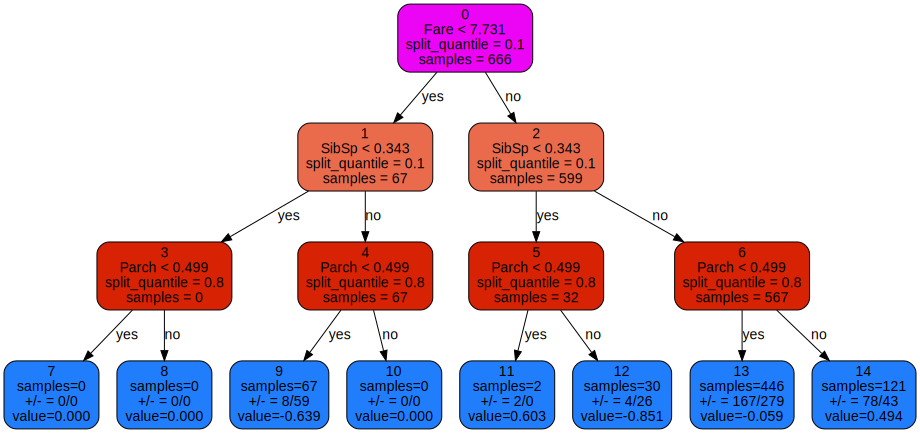

,y,$p_4$,$l_4$,$r_4$,$\gamma_4$,$l_5$,$p_5$
0,0,0.152908,-1.711972,-0.152908,-0.639053,-2.031499,0.115935
1,0,0.201449,-1.377262,-0.201449,0.493975,-1.130274,0.244111
2,0,0.165084,-1.620878,-0.165084,-0.639053,-1.940405,0.125603
3,0,0.177256,-1.535052,-0.177256,-0.058672,-1.564389,0.173018
4,1,0.176645,-1.539248,0.823355,-0.058672,-1.568584,0.172418
...,...,...,...,...,...,...,...
661,1,0.870839,1.908400,0.129161,0.493975,2.155387,0.896171
662,0,0.201449,-1.377262,-0.201449,-0.058672,-1.406598,0.196771
663,1,0.907051,2.278153,0.092949,-0.058672,2.248817,0.904548
664,1,0.902185,2.221737,0.097815,-0.058672,2.192401,0.899565


In [66]:
iterate(4)

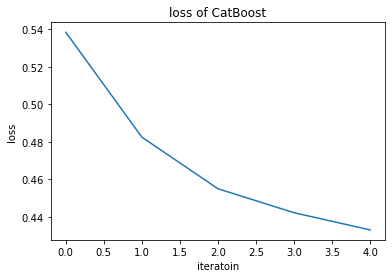

In [67]:
plt.plot(loss[1:])
plt.title('loss of CatBoost')
plt.xlabel('iteratoin')
plt.ylabel('loss')
plt.show()

In [48]:
class CatBoostClassifier():
    
    n_estimators = 100
    
    #now let's get started
    learning_rate=0.2
    trees = []
    loss = []
    residuals = np.zeros([100,n_train])
    probabilities = np.zeros([100,n_train])
    predictions = np.zeros([100,n_train])
    log_of_odds = np.zeros([100,n_train])
    gamma = np.zeros([100,n_train])
    log_of_odds[0] = [0] * n_train

    def __init__(self, n_estimators=100):
        self.n_estimators = n_estimators
        pass
    
    def iterate(self, i, X_train, y_train):
        n_train=len(y_train)
        t = ObliviousTree(max_depth=3, gamma=5)
        t.fit(X_train,self.residuals[i], self.probabilities[i])
        #t.prune()
        self.trees.append(t)
        

        self.gamma[i]=t.predict(X_train)
        self.log_of_odds[i+1] = self.log_of_odds[i] + self.learning_rate * self.gamma[i]
        self.probabilities[i+1] = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in self.log_of_odds[i+1]])
        self.predictions[i+1] = (self.probabilities[i+1]>0.5)*1.0
        self.residuals[i+1]=y_train-self.probabilities[i+1]
        _loss=np.sum(-y_train * self.log_of_odds[i+1] + np.log(1+np.exp(self.log_of_odds[i+1])))/n_train
        self.loss.append(_loss)

    def fit(self, X_train, y_train):
        n_train=len(y_train)
        #n_estimators=10
        #now let's get started
        self.learning_rate=0.3
        self.loss = []
        self.trees = []
        self.residuals = np.zeros([self.n_estimators+1, n_train])
        self.probabilities = np.zeros([self.n_estimators+1, n_train])
        self.predictions = np.zeros([self.n_estimators+1, n_train])
        self.log_of_odds = np.zeros([self.n_estimators+1, n_train])
        self.gamma = np.zeros([self.n_estimators+1, n_train])
        self.log_of_odds[0] = [0] * n_train
        self.probabilities[0] = [0.5] * n_train
        self.predictions[0] = [1] * n_train
        self.residuals[0] = y_train - probabilities[0]
        loss0=-(y_train*np.log(probabilities[0])+(1-y_train)*np.log(1-probabilities[0]))
        loss0 = np.sum(loss0) / n_train
        self.loss.append(loss0)
        
        for i in range(self.n_estimators):
            self.iterate(i, X_train, y_train)

    def predict_proba(self, X):
        X = np.array(X)
        log_of_odds = np.array([0.0] * X.shape[0])
        for t in self.trees:
            log_of_odds+=t.predict(X)
        results = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in log_of_odds])
        return results
    
    def predict(self, X):
        proba = self.predict_proba(X)
        results = (proba>0.5) * 1.0
        return results
    
    def accuracy(self, X, y):
        n=len(y)
        y_hat = self.predict(X)
        right = np.sum(y_hat == y)
        return right/n * 1.0

In [49]:
model = CatBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)

In [52]:
model.accuracy(X_train, y_train)

0.8288288288288288

In [53]:
model.accuracy(X_test, y_test)

0.8116591928251121

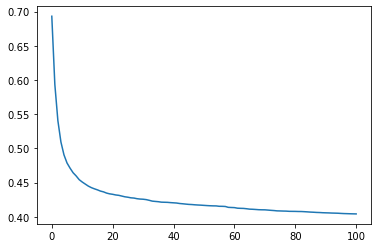

In [54]:
plt.plot(model.loss)
plt.show()

In [151]:
df_submit

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [149]:
df_test = pd.read_csv("data/titanic_test.csv")

In [152]:
df_submit = df_test.copy()
df_submit['Survived'] = 0

In [153]:
df_submit=df_submit[['PassengerId', 'Survived']]

In [154]:
df_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [144]:
df_test = data_preprocess(df_test)

In [145]:
df_test = target_statistics(df_test)

In [146]:
df_test

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0.242506,1,0.345426,0.343687,7.8292,0.389573
1,0.242506,0,0.535522,0.343687,7.0000,0.336993
2,0.472585,1,0.345426,0.343687,9.6875,0.389573
3,0.242506,1,0.345426,0.343687,8.6625,0.336993
4,0.242506,0,0.535522,0.550143,12.2875,0.336993
...,...,...,...,...,...,...
413,0.242506,1,0.345426,0.343687,8.0500,0.336993
414,0.629062,0,0.345426,0.343687,108.9000,0.553068
415,0.242506,1,0.345426,0.343687,7.2500,0.336993
416,0.242506,1,0.345426,0.343687,8.0500,0.336993


In [148]:
y_hat=model.predict(df_test.values)

In [155]:
df_submit['Survived'] = y_hat

In [157]:
df_submit['Survived'] = df_submit['Survived'].astype(int)

In [159]:
df_submit.to_csv("data/titanic_catboost.csv", index=False)

I submitted it to kaggle the accuracy is 0.77511, not bad. It is even much better than some attempts when I use XGB.